
# Import Libraries

In [8]:
import numpy as np #NumPy contains a multi-dimensional array and matrix data structures.
import pandas as pd #If you work with tabular, time series, or matrix data, pandas is your go-to Python package. 
import seaborn as sns #Seaborn is a high-level interface for drawing attractive statistical graphics with just a few lines of code.
import matplotlib.pyplot as plt #Matplotlib is the most common data exploration and visualization library.
#You can use it to create basic graphs like line plots, histograms, scatter plots, bar charts, and pie charts.

from sklearn.metrics import accuracy_score #scikit-learn is an efficient and beginner-friendly tool for predictive data analysi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import joblib #Joblib is a set of tools to provide lightweight pipelining in Python.
import warnings
warnings.filterwarnings('ignore')

# Import Datasets

In [9]:
train = pd.read_csv(r"train.csv") #r to read the csv file
test = pd.read_csv(r"test.csv")

# Understanding the data

In [10]:
# Loan_ID : Unique Loan ID

# Gender : Male/ Female

# Married : Applicant married (Y/N)

# Dependents : Number of dependents

# Education : Applicant Education (Graduate/ Under Graduate)

# Self_Employed : Self employed (Y/N)

# ApplicantIncome : Applicant income

# CoapplicantIncome : Coapplicant income

# LoanAmount : Loan amount in thousands of dollars

# Loan_Amount_Term : Term of loan in months

# Credit_History : Credit history meets guidelines yes or no

# Property_Area : Urban/ Semi Urban/ Rural

# Loan_Status : Loan approved (Y/N) this is the target variable



# Display Top 5 Rows of The Dataset

In [11]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Check Last 5 Rows of The Dataset

In [13]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [14]:
test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


# Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [15]:
train.shape #shape attribute in Pandas enables us to obtain the shape of a DataFrame.

(614, 13)

In [16]:
test.shape

(367, 12)

In [17]:
print("Number of row",train.shape[0])
print("Number of column",test.shape[1])

Number of row 614
Number of column 12


In [18]:
print("Number of row",test.shape[0])
print("Number of column",test.shape[1])

Number of row 367
Number of column 12


# Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
test.info

<bound method DataFrame.info of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0   

In [21]:
train.describe(include='all').T #The describe() method returns description of the data in the DataFrame.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP002158,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614,NaN,NaN,NaN,5403.46,6109.04,150,2877.5,3812.5,5795,81000
CoapplicantIncome,614,NaN,NaN,NaN,1621.25,2926.25,0,0,1188.5,2297.25,41667
LoanAmount,592,NaN,NaN,NaN,146.412,85.5873,9,100,128,168,700
Loan_Amount_Term,600,NaN,NaN,NaN,342,65.1204,12,360,360,360,480


In [22]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,367,367,LP002759,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,356,2,Male,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,367,2,Yes,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,357,4,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,367,2,Graduate,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,344,2,No,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,367,NaN,NaN,NaN,4805.6,4910.69,0,2864,3786,5060,72529
CoapplicantIncome,367,NaN,NaN,NaN,1569.58,2334.23,0,0,1025,2430.5,24000
LoanAmount,362,NaN,NaN,NaN,136.133,61.3667,28,100.25,125,158,550
Loan_Amount_Term,361,NaN,NaN,NaN,342.537,65.1566,6,360,360,360,480


# Finding duplicate values

In [23]:
train.duplicated().sum() #You can count the number of duplicate rows by counting True in pandas.\
#Series obtained with duplicated(). The number of True can be counted with sum() method.

0

In [24]:
test.duplicated().sum()

0

# Check Null Values In The Dataset

In [25]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
train.isnull().sum()*100/len(train)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [28]:
test.isnull().sum()*100/len(test)

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

# Exploratory Data analysis

In [29]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [30]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

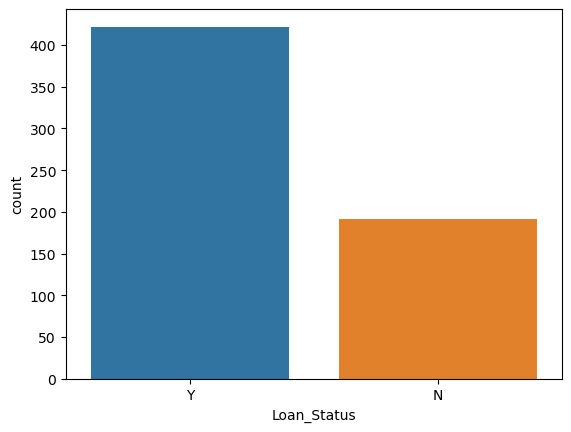

In [31]:
sns.countplot(data=train, x="Loan_Status")

In [32]:
# Comparison of loan status based on gender
train.groupby("Gender")['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

In [33]:
train.groupby("Gender")['Loan_Status'].value_counts(normalize=True)

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

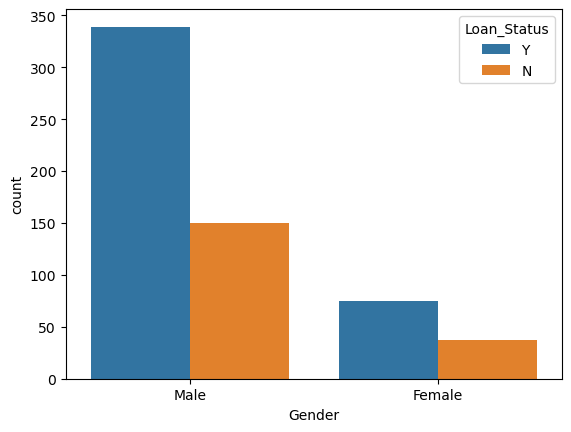

In [34]:
sns.countplot(data=train["Loan_Status"], x=train["Gender"], hue=train["Loan_Status"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

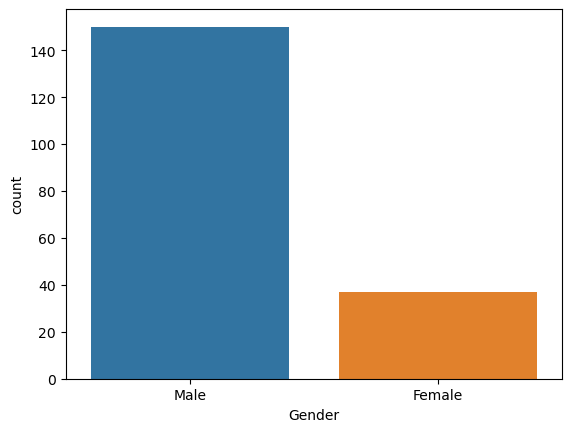

In [35]:
sns.countplot(data = train[train["Loan_Status"]=='N'], x="Gender")

In [36]:
# Comparison of loan approvals based on married status
train.groupby("Married")["Loan_Status"].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: Loan_Status, dtype: int64

In [37]:
train.groupby("Married")["Loan_Status"].value_counts(normalize=True)

Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Married', ylabel='count'>

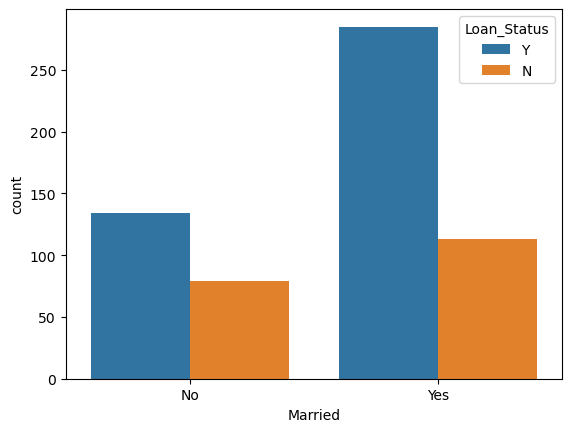

In [38]:
sns.countplot(data=train["Loan_Status"], x=train["Married"], hue=train["Loan_Status"])

<AxesSubplot:>

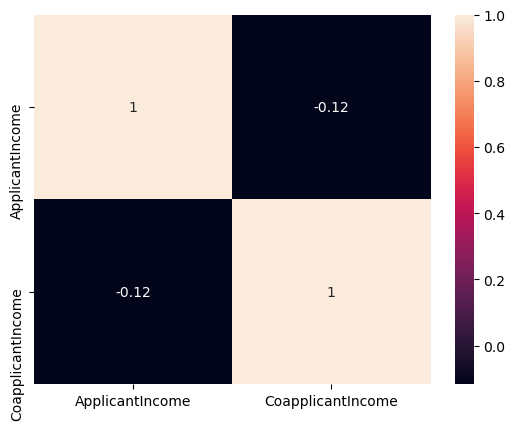

In [39]:
sns.heatmap(train[['ApplicantIncome','CoapplicantIncome']].corr(), annot=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

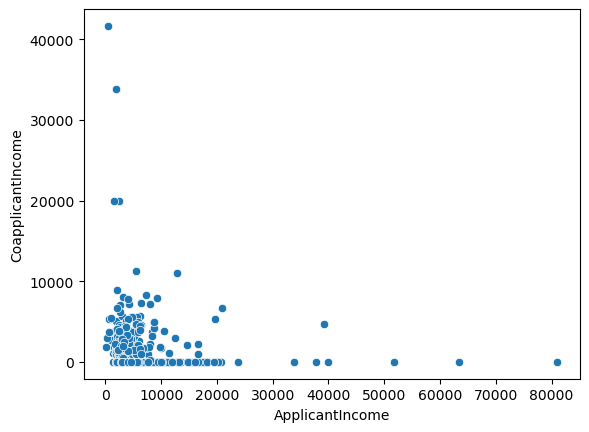

In [40]:
sns.scatterplot(x="ApplicantIncome", y="CoapplicantIncome", data=train)

In [41]:
# Number of applicants having dependents
train[train['Dependents'] != '0'].shape[0]

269

In [42]:
# % of applicants having dependents
train[train['Dependents']!='0'].shape[0]/train.shape[0]

0.4381107491856677

In [43]:
train.groupby("Dependents")["Loan_Status"].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

In [44]:
train.groupby("Dependents")["Loan_Status"].value_counts(normalize=True)

Dependents  Loan_Status
0           Y              0.689855
            N              0.310145
1           Y              0.647059
            N              0.352941
2           Y              0.752475
            N              0.247525
3+          Y              0.647059
            N              0.352941
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

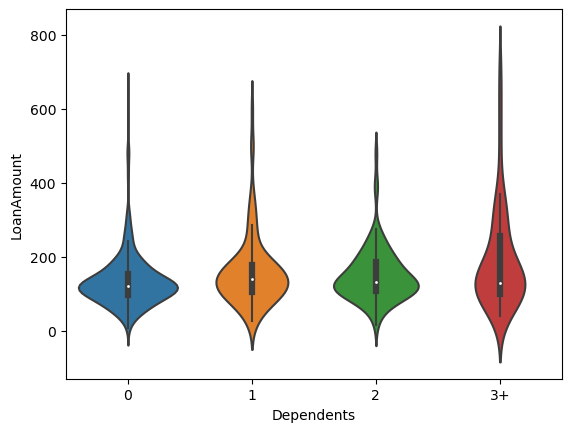

In [45]:
sns.violinplot(x=train["Dependents"], y=train["LoanAmount"])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

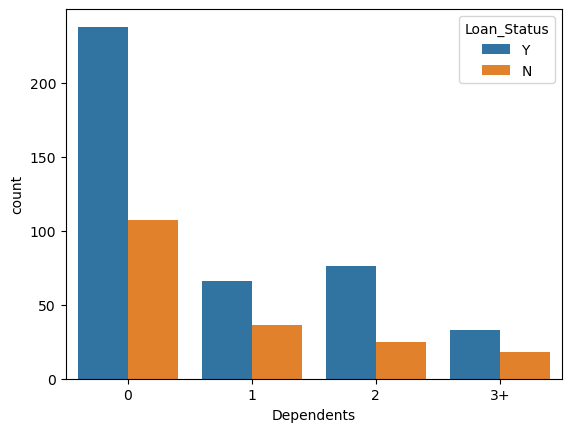

In [46]:
sns.countplot(data=train["Loan_Status"], x=train["Dependents"], hue=train["Loan_Status"])

In [47]:
# Comparison of loan status based on education
train.groupby("Education")["Loan_Status"].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

In [48]:
train.groupby("Education")["Loan_Status"].value_counts(normalize=True)

Education     Loan_Status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

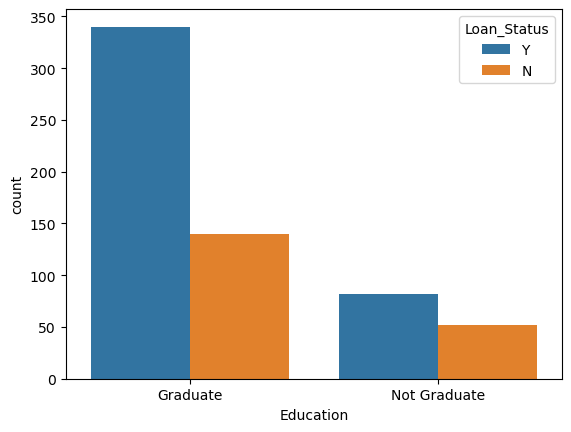

In [49]:
sns.countplot(data=train["Loan_Status"], x=train["Education"], hue=train["Loan_Status"])

In [50]:
# Comparison of incomes of those who are employed and those who are self employed 
train.groupby("Self_Employed")['ApplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Self_Employed,,,,,,,,
No,500.0,5049.748000,5682.895810,150.0,2824.50,3705.5,5292.75,81000.0
Yes,82.0,7380.817073,5883.564795,674.0,3452.25,5809.0,9348.50,39147.0


<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

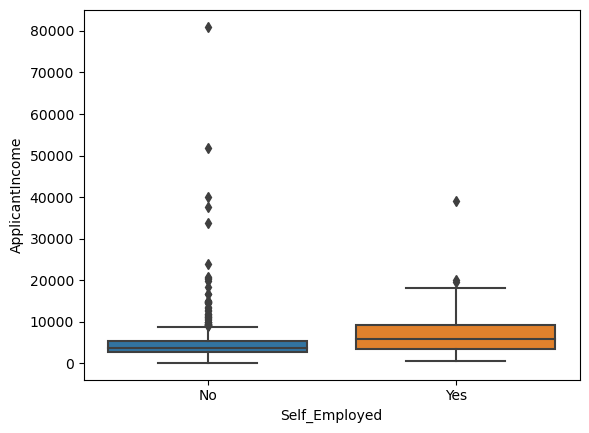

In [51]:
sns.boxplot(x ="Self_Employed",y ="ApplicantIncome", data = train)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

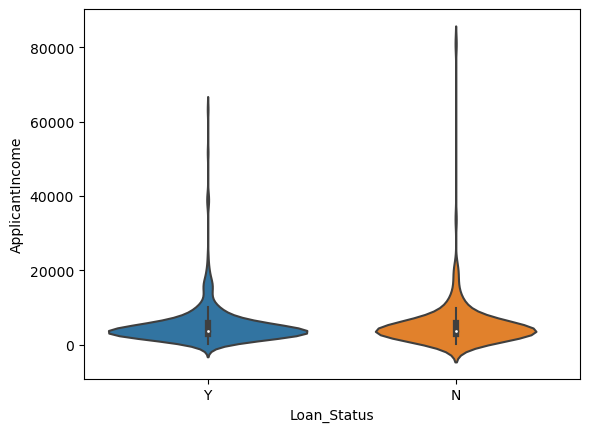

In [52]:
sns.violinplot(data=train, x="Loan_Status", y="ApplicantIncome")

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

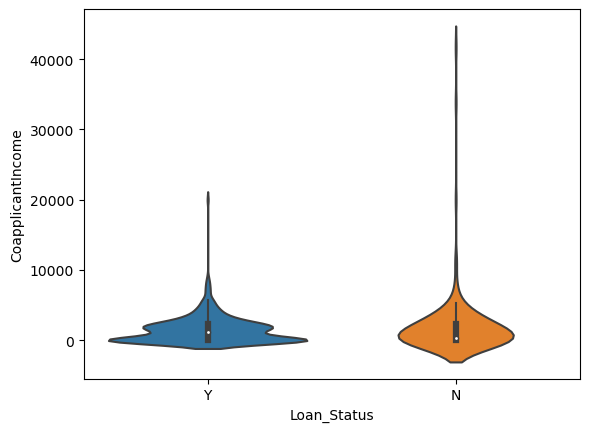

In [53]:
sns.violinplot(data=train, x="Loan_Status", y="CoapplicantIncome")

<AxesSubplot:xlabel='Loan_Status'>

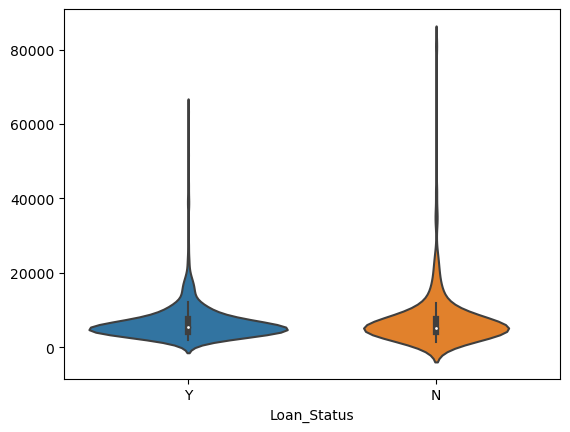

In [54]:
sns.violinplot(x=train["Loan_Status"], y=train[["ApplicantIncome", "CoapplicantIncome"]].sum(axis=1))

In [55]:
# Are applicants with a credit history more likely to default than those who do not have one?
train.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

In [56]:
train.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

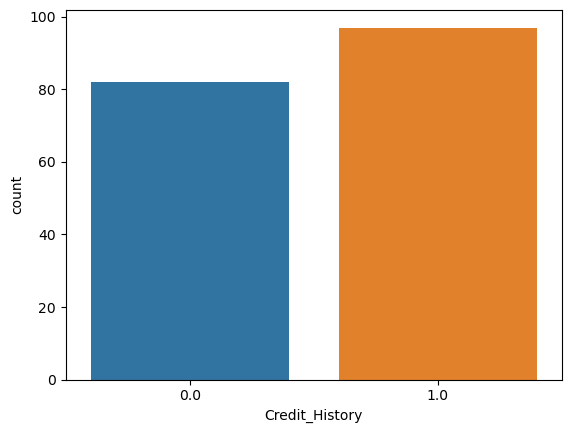

In [57]:
sns.countplot(data = train[train["Loan_Status"]=='N'], x="Credit_History")

In [58]:
# Finding correlation between the applicant's income and the loan amount applied
train[['ApplicantIncome','LoanAmount']].corr()

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.570909
LoanAmount,0.570909,1.000000


<AxesSubplot:>

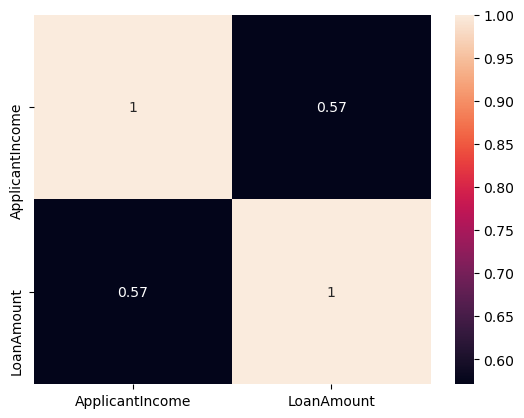

In [59]:
sns.heatmap(train[['ApplicantIncome','LoanAmount']].corr(), annot=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

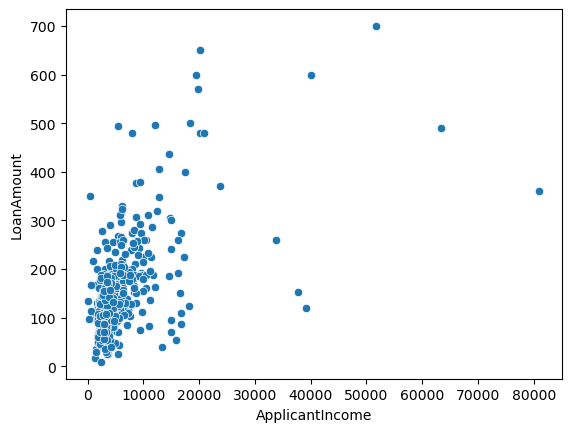

In [60]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=train)

# Data Cleaning

In [61]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
train.drop(['Loan_ID'], axis=1, inplace=True)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
train.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [64]:
# Handling missing values 
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].median())
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])

Handling missing values of Loan Amount

<AxesSubplot:>

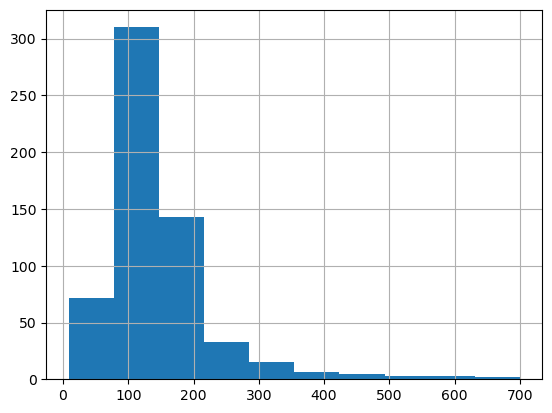

In [65]:
train['LoanAmount'].hist()

In [66]:
corr_matrix = train.corr()
print(corr_matrix['LoanAmount'].sort_values(ascending=False))

LoanAmount           1.000000
ApplicantIncome      0.570909
CoapplicantIncome    0.188619
Loan_Amount_Term     0.039447
Credit_History      -0.001463
Name: LoanAmount, dtype: float64


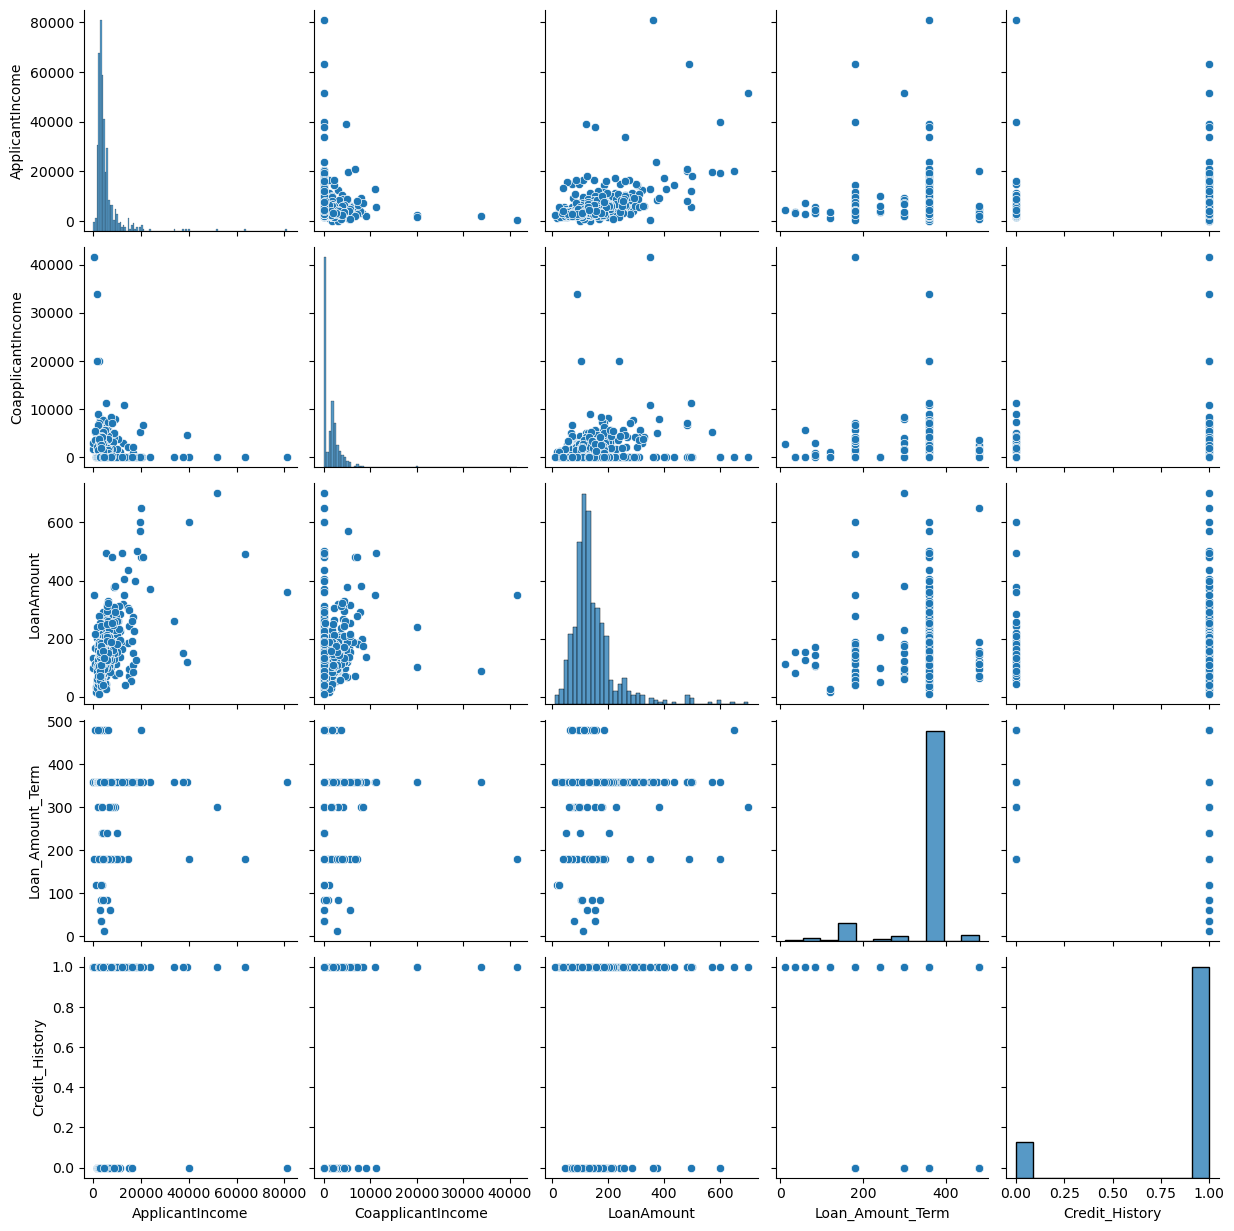

In [67]:
sns.pairplot(train)

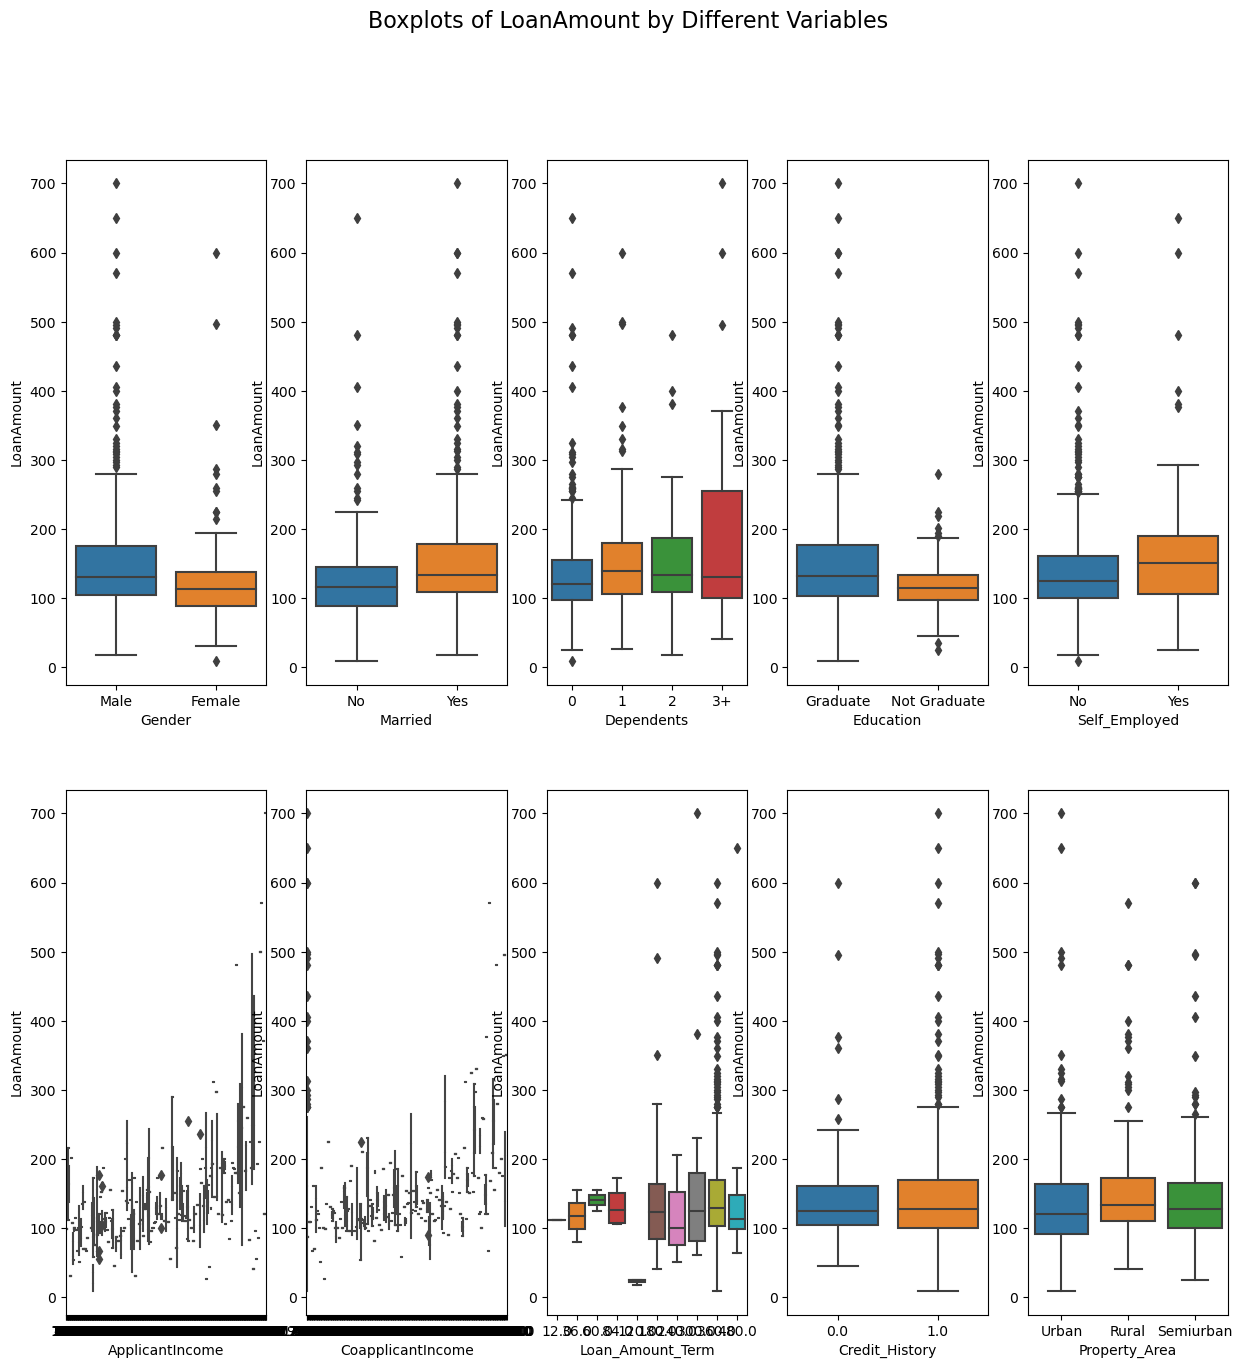

In [68]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 15))

# Create box plots for each column in the subset of the dataframe
sns.boxplot(x='Gender', y='LoanAmount', data=train, ax=axs[0][0])
sns.boxplot(x='Married', y='LoanAmount', data=train, ax=axs[0][1])
sns.boxplot(x='Dependents', y='LoanAmount', data=train, ax=axs[0][2])
sns.boxplot(x='Education', y='LoanAmount', data=train, ax=axs[0][3])
sns.boxplot(x='Self_Employed', y='LoanAmount', data=train, ax=axs[0][4])
sns.boxplot(x='ApplicantIncome', y='LoanAmount', data=train, ax=axs[1][0])
sns.boxplot(x='CoapplicantIncome', y='LoanAmount', data=train, ax=axs[1][1])
sns.boxplot(x='Loan_Amount_Term', y='LoanAmount', data=train, ax=axs[1][2])
sns.boxplot(x='Credit_History', y='LoanAmount', data=train, ax=axs[1][3])
sns.boxplot(x='Property_Area', y='LoanAmount', data=train, ax=axs[1][4])
# Add a main title for the figure
fig.suptitle('Boxplots of LoanAmount by Different Variables', fontsize=16)

# Display the figure
plt.show()

In [69]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())

Handling missing values of loan amount term

<AxesSubplot:>

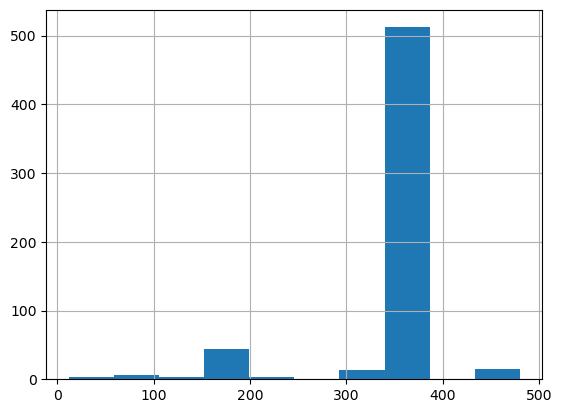

In [70]:
train['Loan_Amount_Term'].hist()

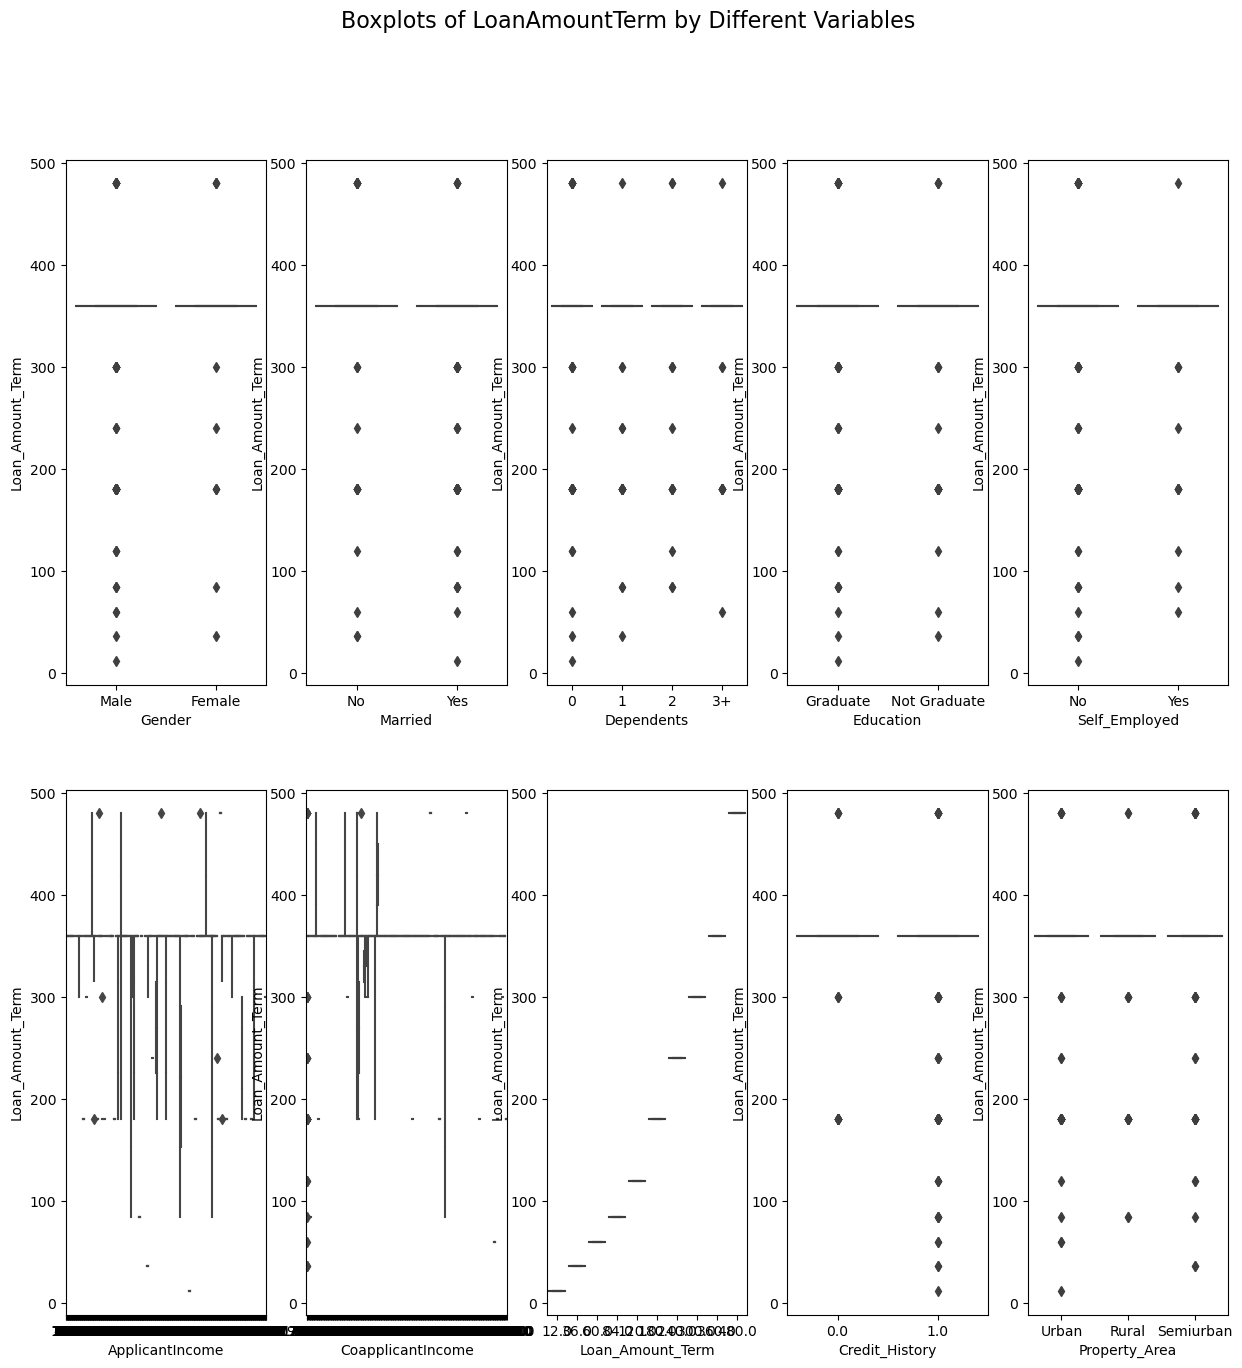

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 15))

# Create box plots for each column in the subset of the dataframe
sns.boxplot(x='Gender', y='Loan_Amount_Term', data=train, ax=axs[0][0])
sns.boxplot(x='Married', y='Loan_Amount_Term', data=train, ax=axs[0][1])
sns.boxplot(x='Dependents', y='Loan_Amount_Term', data=train, ax=axs[0][2])
sns.boxplot(x='Education', y='Loan_Amount_Term', data=train, ax=axs[0][3])
sns.boxplot(x='Self_Employed', y='Loan_Amount_Term', data=train, ax=axs[0][4])
sns.boxplot(x='ApplicantIncome', y='Loan_Amount_Term', data=train, ax=axs[1][0])
sns.boxplot(x='CoapplicantIncome', y='Loan_Amount_Term', data=train, ax=axs[1][1])
sns.boxplot(x='Loan_Amount_Term', y='Loan_Amount_Term', data=train, ax=axs[1][2])
sns.boxplot(x='Credit_History', y='Loan_Amount_Term', data=train, ax=axs[1][3])
sns.boxplot(x='Property_Area', y='Loan_Amount_Term', data=train, ax=axs[1][4])

# Add a main title for the figure
fig.suptitle('Boxplots of LoanAmountTerm by Different Variables', fontsize=16)

# Display the figure
plt.show()

In [72]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())

In [73]:
Y = train.Loan_Status
Y = np.where(Y == 'Y', 1, 0)
X = pd.get_dummies(train.drop('Loan_Status',axis=1), drop_first = True)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1


In [74]:
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [75]:
col_names = X.columns
scaler = StandardScaler()
# Fit the scaler to the features
scaler.fit(X)

# Transform the features using the scaler
X_scaled = scaler.transform(X)

# Convert the scaled numpy array back to a dataframe
X = pd.DataFrame(X_scaled, columns=col_names)

# View the standardized data with column names
print(X.head(20))

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0          0.072991          -0.554487    0.000000          0.279851   
1         -0.134412          -0.038732   -0.219273          0.279851   
2         -0.393747          -0.554487   -0.957641          0.279851   
3         -0.462062           0.251980   -0.314547          0.279851   
4          0.097728          -0.554487   -0.064454          0.279851   
5          0.002218           0.880600    1.436099          0.279851   
6         -0.503019          -0.035995   -0.612275          0.279851   
7         -0.387850           0.301914    0.138001          0.279851   
8         -0.228939          -0.032575    0.257093          0.279851   
9          1.218457           3.196713    2.412650          0.279851   
10        -0.360982          -0.315078   -0.910004          0.279851   
11        -0.475660           0.074817   -0.445547          0.279851   
12        -0.381788           2.217871    0.638186          0.27

<AxesSubplot:>

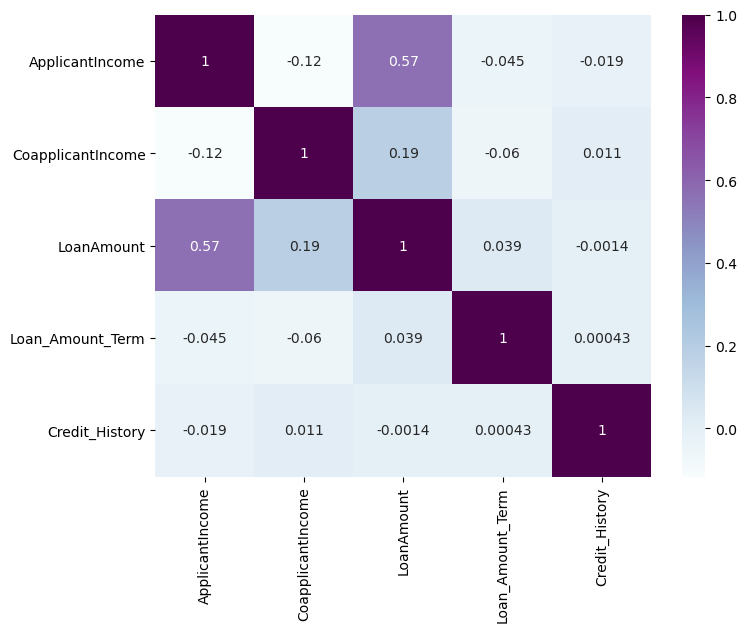

In [76]:
corr = train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot = True,cmap= "BuPu")

# Handling The missing Values

In [77]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']
train = train.dropna(subset=columns)


In [78]:
train['Self_Employed'].mode()[0]
train['Self_Employed'] =train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])


In [79]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [80]:
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [81]:
train['Credit_History'].mode()[0]

1.0

In [82]:
train['Credit_History'] =train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [83]:
train.isnull().sum()*100 / len(train)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

# Handling Categorical Columns

In [84]:
train.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
593,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y
262,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N
17,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
143,Male,Yes,0,Graduate,No,2698,2034.0,122.0,360.0,1.0,Semiurban,Y
405,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,Y
596,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
96,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
126,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
302,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,1.0,Rural,Y


In [85]:
train['Dependents'] =train['Dependents'].replace(to_replace="3+",value='4')
train['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [86]:
train['LoanAmount'] =train['LoanAmount'].replace(to_replace="NaN",value='0')
train['LoanAmount'].unique()

array([146.41216216, 128.        ,  66.        , 120.        ,
       141.        , 267.        ,  95.        , 158.        ,
       168.        , 349.        ,  70.        , 109.        ,
       200.        , 114.        ,  17.        , 125.        ,
       100.        ,  76.        , 133.        , 115.        ,
       104.        , 315.        , 116.        , 112.        ,
       151.        , 191.        , 122.        , 110.        ,
        35.        , 201.        ,  74.        , 106.        ,
       320.        , 144.        , 184.        ,  80.        ,
        47.        ,  75.        , 134.        ,  96.        ,
        88.        ,  44.        , 286.        ,  97.        ,
       135.        , 180.        ,  99.        , 165.        ,
       258.        , 126.        , 312.        , 136.        ,
       172.        ,  81.        , 187.        , 113.        ,
       176.        , 130.        , 111.        , 167.        ,
       265.        ,  50.        , 210.        , 175.  

In [87]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [88]:
train['Gender'] = train['Gender'].map({'Male':1,'Female':0}).astype('int')
train['Married'] = train['Married'].map({'Yes':1,'No':0}).astype('int')
train['Education'] = train['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
train['Self_Employed'] = train['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
train['Property_Area'] = train['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
train['Loan_Status'] = train['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [89]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [90]:
train.shape

(614, 12)

# Store Feature Matrix In X And Response (Target) In Vector y

In [91]:
X = train.drop('Loan_Status',axis=1)

In [92]:
y = train['Loan_Status']


In [93]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [94]:
train.shape

(614, 12)

# Feature Scaling

In [95]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [96]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [97]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,0.072991,-0.554487,0.000000,0.279851,1.0,1
1,1,1,1,1,0,-0.134412,-0.038732,-0.219273,0.279851,1.0,0
2,1,1,0,1,1,-0.393747,-0.554487,-0.957641,0.279851,1.0,1
3,1,1,0,0,0,-0.462062,0.251980,-0.314547,0.279851,1.0,1
4,1,0,0,1,0,0.097728,-0.554487,-0.064454,0.279851,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.410130,-0.554487,-0.898095,0.279851,1.0,0
610,1,1,4,1,0,-0.212557,-0.554487,-1.267279,-2.518655,1.0,0
611,1,1,1,1,0,0.437174,-0.472404,1.269371,0.279851,1.0,1
612,1,1,2,1,0,0.357064,-0.554487,0.483367,0.279851,1.0,1


# Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation

In [98]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)
    

In [99]:
model_df

{}

# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.7886178861788617
LogisticRegression() Avg cross val score is 0.8061975209916034


# SVC

In [101]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7804878048780488
SVC() Avg cross val score is 0.8013061442089832


# Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)


DecisionTreeClassifier() accuracy is 0.6910569105691057
DecisionTreeClassifier() Avg cross val score is 0.7068905771024924


# Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)


RandomForestClassifier() accuracy is 0.7804878048780488
RandomForestClassifier() Avg cross val score is 0.7834199653471945


# Gradient Boosting Classifier

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.7642276422764228
GradientBoostingClassifier() Avg cross val score is 0.7833933093429295


# Hyperparameter Tuning

In [105]:
from sklearn.model_selection import RandomizedSearchCV

# Logistic Regression

In [106]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [107]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)


In [108]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [109]:
rs_log_reg.best_score_

0.809462881514061

In [110]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

# SVC

In [111]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [112]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [113]:
rs_svc.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [114]:
rs_svc.best_score_

0.809462881514061

In [115]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

# Random Forest Classifier

In [116]:
RandomForestClassifier()

RandomForestClassifier()

In [117]:
rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }


In [118]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [119]:
rs_rf.fit(X,y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 9

In [120]:
rs_rf.best_score_

0.809462881514061

In [121]:
rs_rf.best_params_

{'n_estimators': 520,
 'min_samples_split': 50,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 20}

# Save The Model

In [122]:
X = train.drop('Loan_Status',axis=1)
y = train['Loan_Status']

In [123]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)


In [124]:
rf.fit(X,y)


RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=270)

In [125]:
import joblib

In [126]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [127]:
model = joblib.load('loan_status_predict')

In [128]:
import pandas as pd
df = pd.DataFrame({
    'Gender':0,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':1,
    'ApplicantIncome':0,
    'CoapplicantIncome':0,
    'LoanAmount':450,
    'Loan_Amount_Term':0,
    'Credit_History':0,
    'Property_Area':0
},index=[0])

In [129]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,2,0,1,0,0,450,0,0,0


In [130]:
result = model.predict(df)

In [131]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


# GUI

In [132]:
from tkinter import *
import joblib
import pandas as pd

In [ ]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)
        
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education").grid(row=4)
Label(master,text = "Self_Employed").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount").grid(row=8)
Label(master,text = "Loan_Amount_Term").grid(row=9)
Label(master,text = "Credit_History").grid(row=10)
Label(master,text = "Property_Area").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()